In [98]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

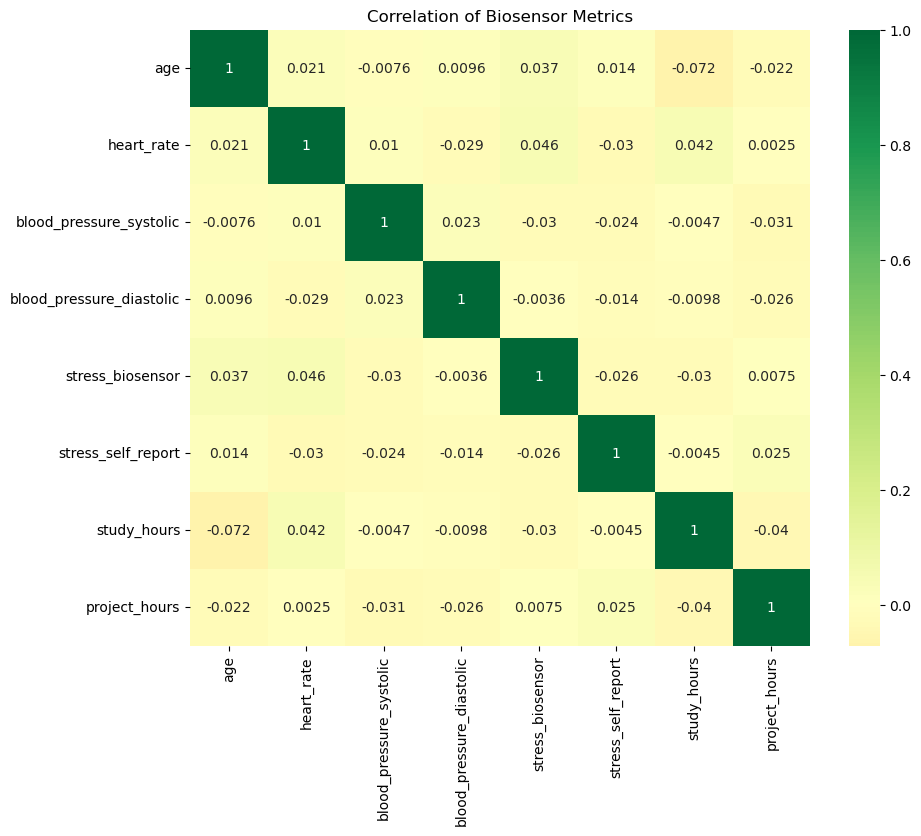

In [99]:
numeric_df = df_sim.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlGn', center=0)
plt.title('Correlation of Biosensor Metrics')
plt.show

In [ ]:
#Load the simulated data
df_sim = pd.read_csv('../data/student_health_data.csv')

,Student_ID,Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.9600,70.101863,119.835380,79.854756,5.483909,5.361601,30.227037,14.887368
std,288.819436,2.0036,9.544663,14.604307,9.641699,2.596108,2.550382,10.341060,4.888624
min,1.000000,18.0000,50.000000,90.000000,60.000000,1.008491,1.002186,5.000000,0.000000
25%,250.750000,19.0000,63.347970,109.386868,73.115420,3.270567,3.172409,23.262704,11.573503
50%,500.500000,21.0000,70.330916,120.051654,79.651738,5.368891,5.234889,30.432767,14.765873
75%,750.250000,23.0000,76.425149,130.397799,86.535640,7.674233,7.471178,37.245193,18.159167
max,1000.000000,24.0000,99.650104,165.929204,107.659796,9.994153,9.964115,60.000000,32.720325


In [ ]:
#Load the simulated data
try: 
    df_sim = pd.read_csv('../data/student_health_data.csv')
except FileNotFoundError:
    print("Error: File not found. Check your file path.")
    df_sim.columns = [col.lower().replace(' ','_') for col in df_sim.columns]
mapping = {
    'stress_level_biosensor': 'stress_biosensor',
    'stress_level_self_report': 'stress_self_report',
    'sleep_duration': 'sleep_hours',
    'hours_of_sleep': 'sleep_hours',
    'gender': 'gender_bin'
}

df_sim.describe()

In [120]:
df_sim = pd.read_csv('../data/student_health_data.csv')

#renamed and clean
df_sim.columns = [col.lower().replace(' ', '_') for col in df_sim.columns]

#Rename Columns to mirror MIT
sns.lmplot(
    'stress_level_biosensor': 'stress_biosensor',
    'stress_level_self_report': 'stress_self_report',
    'sleep_duration': 'sleep_hours',
    'hours_of_sleep': 'sleep_hours',
    'gender': 'gender_bin',
    'heart_rate': 'heart_rate'
)

df_sim.rename(columns=sns.lmplot, inplace=True)
     
#Mirror MIT:  0 = Male, 1 = Female

if 'gender_bin'in df_sim.columns:
    gender_map = {'Male': 0, 'Female': 1, 'M': 0, 'F': 1, 'male': 0, 'female':1}
    df_sim['gender_bin'] = df_sim['gender_bin'].map(gender_map).fillna(0).astype(int)

#Create labels/thresholds
def categorize_stress(score):
    if score >= 7: return 'High'
    elif score >= 4: return 'Medium'
    else: return 'Low'
    
#Check if the column is 'Object'/text before mapping
df_sim['biosensor_label'] = df_sim['stress_biosensor'].apply(categorize_stress)

print("Success!")
print(f"Current Columns: {df_sim.columns.tolist()}")

SyntaxError: invalid syntax (3697684386.py, line 8)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(data=df_sim, x='study_hours', y= 'heart_rate', hue='gender')

plt.title('Audit: AI-Generated Bias')
plt.show
print(df_sim[['study_hours', 'heart_rate']].corr())

KeyError: "['gender'] not in index"

In [ ]:
df_sim['Gender'].value_counts()

Gender
M    519
F    481
Name: count, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(data=data=df_sim, x='study_hours', y= 'heart_rate', hue+'gender')

plt.title('Audit: AI-Generated Bias')
plt.show
print(df_sim[['study_hours', 'heart_rate']].corr())

mapping = {
    'sleep_duration': 'sleep_hours',
    'hours_of_sleep': 'sleep_hours',
    'heart_rate': 'heart_rate',
    'gender': 'gender_bin'
}
df_sim.rename(columns=mapping, inplace=True)

if 'sleep_hours'in df_sim.columns and 'heart_rate' in df_sim.columns:
    sns.lmplot(
        data=df_sim,
        x='sleep_hours',
        y='heart_rate',
        hue='gender_bin',
        scatter_kws={'alpha':0.3}
)

    plt.title('Audit: AI-Generated Linear Perfection')
    plt.show()

    correlation = df_sim[['sleep_hours', 'heart_rate']].corr().iloc[0,1]
    print(f"Correlation between Sleep and HR: {correlation:.4f}")
else:
    print("Error: Could not find columns. Current columns are:", df_sim.columns.tolist())                                        

Error: Could not find columns. Current columns are: ['student_id', 'age', 'gender_bin', 'heart_rate', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'stress_level_biosensor', 'stress_level_self_report', 'physical_activity', 'sleep_quality', 'mood', 'study_hours', 'project_hours', 'health_risk_level']
